# VII. Веб-карта с Folium (II)


## и данные портала открытых данных Правительства Москвы ...


На этой неделе мы посмотрим, как выгружать геоданные с Портала Открытых данных Правительства Москвы, а также визуализировать на интерактивной карте точки с фотографиями


## Импортируем библиотеки


In [124]:
import geopandas as gpd
import requests
import pandas as pd

import folium 
import base64
import os

## 1. DataMos API: никогда не было проще скачивать данные с data_mos...


#### 1.1 Определяем параметры для запроса


In [125]:
datamos_api = '31767935-5ac6-45e0-8bb4-35238f7526a7'

In [126]:
# datamos_api = 'yourAPIcode'
data_set = 62883 

url_data = f'https://apidata.mos.ru/v1/datasets/{data_set}/features?api_key={datamos_api}'

#### 1.2 Отправляем запрос


In [127]:
data_mos = requests.get(url = url_data )

смотрим на статус запроса


In [128]:
data_mos.status_code

200

смотрим на ответ


In [129]:
data_mos.json()

{'features': [{'geometry': {'coordinates': [37.900526, 55.414307],
    'type': 'Point'},
   'properties': {'datasetId': 62883,
    'rowId': None,
    'attributes': {'is_deleted': 0,
     'ID': 1,
     'Name': 'Домодедово',
     'Aeroexpress': 'есть',
     'AeroexpressStation': {'global_id': 1508979300,
      'value': 'Аэропорт Домодедово'},
     'AeroexpressTerminal': 'есть',
     'AeroexpressTicketWindow': 'есть',
     'AeroexpressTicketAutomat': 'есть',
     'AeroexpressWorkingHours': '05:30 - 23:30 (с Павелецкого вокзала), 06:00 - 23:30 (из аэропорта)',
     'MCDStation': [],
     'RailwayStation': [],
     'Latitude_WGS84': '55.414307',
     'Longitude_WGS84': '37.900526',
     'global_id': 1272818040},
    'releaseNumber': 41,
    'versionNumber': 1},
   'type': 'Feature'},
  {'geometry': {'coordinates': [37.415713, 55.966771], 'type': 'Point'},
   'properties': {'datasetId': 62883,
    'rowId': None,
    'attributes': {'is_deleted': 0,
     'ID': 2,
     'Name': 'Шереметьево',
  

#### 1.3. Создаем GeoDataFrame


In [130]:
dataGDF = gpd.GeoDataFrame.from_features(data_mos.json()["features"], crs="EPSG:4326")
dataGDF.head()

geometry  datasetId rowId  \
0  POINT (37.90053 55.41431)      62883  None   
1  POINT (37.41571 55.96677)      62883  None   
2  POINT (37.28629 55.60506)      62883  None   
3  POINT (37.51082 55.50286)      62883  None   
4  POINT (38.11781 55.56155)      62883  None   

                                          attributes  releaseNumber  \
0  {'is_deleted': 0, 'ID': 1, 'Name': 'Домодедово...             41   
1  {'is_deleted': 0, 'ID': 2, 'Name': 'Шереметьев...             41   
2  {'is_deleted': 0, 'ID': 3, 'Name': 'Внуково', ...             41   
3  {'is_deleted': 0, 'ID': 4, 'Name': 'Остафьево'...             41   
4  {'is_deleted': 0, 'ID': 5, 'Name': 'Жуковский'...             41   

   versionNumber  
0              1  
1              1  
2              1  
3              1  
4              1

#### 1.4 Разбиваем атрибуты на разные поля


In [131]:
dataGDF_attributes = pd.DataFrame(dataGDF['attributes'].values.tolist(), index=dataGDF.index).applymap(str)
dataGDF_final = pd.concat([dataGDF, dataGDF_attributes], axis = 1).drop('attributes', axis = 1)

dataGDF_final.head()


/var/folders/ry/9bb7wrz54vq_kn2ytlj6ynzm0000gn/T/ipykernel_39923/1609880950.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



geometry  datasetId rowId  releaseNumber  versionNumber  \
0  POINT (37.90053 55.41431)      62883  None             41              1   
1  POINT (37.41571 55.96677)      62883  None             41              1   
2  POINT (37.28629 55.60506)      62883  None             41              1   
3  POINT (37.51082 55.50286)      62883  None             41              1   
4  POINT (38.11781 55.56155)      62883  None             41              1   

  is_deleted ID         Name Aeroexpress  \
0          0  1   Домодедово        есть   
1          0  2  Шереметьево        есть   
2          0  3      Внуково         нет   
3          0  4    Остафьево         нет   
4          0  5    Жуковский         нет   

                                  AeroexpressStation AeroexpressTerminal  \
0  {'global_id': 1508979300, 'value': 'Аэропорт Д...                есть   
1  {'global_id': 1508983189, 'value': 'Аэропорт Ш...                есть   
2                                                 []                 нет   
3                                                 []                 нет   
4                                                 []                 нет   

  AeroexpressTicketWindow AeroexpressTicketAutomat  \
0                    есть                     есть   
1                    есть                     есть   
2                     нет                      нет   
3                     нет                      нет   
4                     нет                      нет   

                             AeroexpressWorkingHours MCDStation  \
0  05:30 - 23:30 (с Павелецкого вокзала), 06:00 -...         []   
1  5:15 - 00:31 (с Белорусского вокзала), 05:14 -...         []   
2                                                            []   
3                                                            []   
4                                                            []   

  RailwayStation Latitude_WGS84 Longitude_WGS84   global_id  
0             []      55.414307       37.900526  1272818040  
1             []      55.966771       37.415713  1272818309  
2             []      55.605059       37.286287  1272818481  
3             []      55.502859       37.510824  1272818826  
4             []      55.561550       38.117812  1272818941

Посмотрим на объекты на карте


In [132]:
dataGDF_final.explore(tiles="cartodb positron")

#### 1.5 Сохраняем данные


In [ ]:
#dataGDF_final.to_file('data_gdf.shp')

/var/folders/ry/9bb7wrz54vq_kn2ytlj6ynzm0000gn/T/ipykernel_39923/2206928343.py:1: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.



## 2. Фотографии для объектов на интерактивной карте


In [134]:
df = dataGDF_final

# Папка с фото
photo_folder = "photos"

# Создаём карту
m = folium.Map(location=[55.75, 37.6], zoom_start=9, tiles="cartodb positron")

# Обход строк GeoDataFrame
for _, row in df.iterrows():
    lat = row.geometry.y
    lon = row.geometry.x
    name = row["Name"]
    photo_filename = f"{name}.jpeg"
    photo_path = os.path.join(photo_folder, photo_filename)

    if os.path.exists(photo_path):
        with open(photo_path, "rb") as f:
            img_base64 = base64.b64encode(f.read()).decode("utf-8")
        html = f'<h4>{name}</h4><img src="data:image/jpeg;base64,{img_base64}" width="300">'
    else:
        html = f"<h4>{name}</h4><p><i>Фото не найдено</i></p>"

    iframe = folium.IFrame(html=html, width=310, height=250)
    popup = folium.Popup(iframe, max_width=310)

    folium.Marker(
        location=[lat, lon],
        popup=popup,
        tooltip=name,
        icon=folium.Icon(icon="plane", prefix="fa", color="blue")
    ).add_to(m)

In [135]:
m

## 3. Интерактивная таблица


Создадим интерактинвную таблицу c помощью ITables на основе атрибутивной таблицы слоя


Импорт нужных библиотек / установка параметров



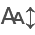

In [136]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
from itables import show

Визуализация


In [137]:
df = dataGDF_final.drop(columns='geometry')
show(df, buttons=["copyHtml5", "csvHtml5", "excelHtml5"])